<a href="https://colab.research.google.com/github/lorenzdes/Finance-functions/blob/main/GEOPLOTTING_WITH_STOCK_MARKET_CAPITALIZATION_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[DATI](https://www.theglobaleconomy.com/rankings/stock_market_capitalization_dollars/)

In [1]:
#importing the data : Download the table inserted in the website
from bs4 import BeautifulSoup
import pandas as pd
import requests

url = "https://www.theglobaleconomy.com/rankings/stock_market_capitalization_dollars/"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df = pd.DataFrame(df_list[0])
df.columns = ['Countries', 'Stock_market_capitalization',
       'Global_rank', 'Available_data']
df

,Countries,Stock_market_capitalization,Global_rank,Available_data
0,USA,40719.66,1,1975 - 2020
1,China,12214.47,2,2003 - 2020
2,Japan,6718.22,3,1975 - 2020
3,Hong Kong,6130.42,4,1975 - 2020
4,Canada,2641.45,5,1977 - 2020
...,...,...,...,...
62,Palestine,3.45,63,1999 - 2020
63,Barbados,2.78,64,1993 - 2020
64,Costa Rica,1.90,65,1993 - 2020
65,Namibia,1.87,66,1993 - 2020


In [2]:
# dataframes of type geopandas for the plot
import geopandas

nybb = geopandas.read_file(geopandas.datasets.get_path('nybb'))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


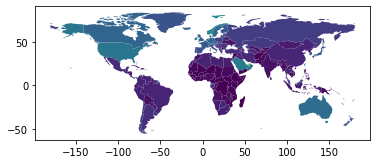

In [3]:
#example of world map
world1 = world[(world.pop_est>0) & (world.name!="Antarctica")]

world1['gdp_per_cap'] = world1.gdp_md_est / world1.pop_est

world1.plot(column='gdp_per_cap');

In [4]:
# Obtain coordinates from country names

import matplotlib.pyplot as plt
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

# declare an empty list to store
# latitude and longitude of values
# of city column
longitude = []
latitude = []

# function to find the coordinate
# of a given city
def findGeocode(city):
	
	# try and catch is used to overcome
	# the exception thrown by geolocator
	# using geocodertimedout
	try:
		
		# Specify the user_agent as your
		# app name it should not be none
		geolocator = Nominatim(user_agent="your_app_name")
		
		return geolocator.geocode(city)
	
	except GeocoderTimedOut:
		
		return findGeocode(city)	

# each value from city column
# will be fetched and sent to
# function find_geocode
for i in (df["Countries"]):
	
	if findGeocode(i) != None:
		
		loc = findGeocode(i)
		
		# coordinates returned from
		# function is stored into
		# two separate list
		latitude.append(loc.latitude)
		longitude.append(loc.longitude)
	
	# if coordinate for a city not
	# found, insert "NaN" indicating
	# missing value
	else:
		latitude.append(np.nan)
		longitude.append(np.nan)
  


In [5]:
# union of dataframe and lists got from the above function

df = pd.concat([df.assign(latitude=i) for i in latitude], ignore_index = True)
df = pd.concat([df.assign(longitude=i) for i in longitude], ignore_index = True)

In [6]:
df

,Countries,Stock_market_capitalization,Global_rank,Available_data,latitude,longitude
0,USA,40719.66,1,1975 - 2020,39.78373,-100.445882
1,China,12214.47,2,2003 - 2020,39.78373,-100.445882
2,Japan,6718.22,3,1975 - 2020,39.78373,-100.445882
3,Hong Kong,6130.42,4,1975 - 2020,39.78373,-100.445882
4,Canada,2641.45,5,1977 - 2020,39.78373,-100.445882
...,...,...,...,...,...,...
300758,Palestine,3.45,63,1999 - 2020,32.30382,-64.756165
300759,Barbados,2.78,64,1993 - 2020,32.30382,-64.756165
300760,Costa Rica,1.90,65,1993 - 2020,32.30382,-64.756165
300761,Namibia,1.87,66,1993 - 2020,32.30382,-64.756165


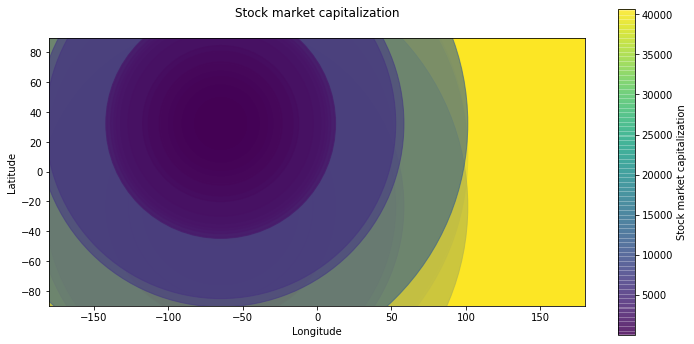

In [7]:
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


#mappa di intensità
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our Impact Energy data with a color map
x = df['longitude']
y = df['latitude']
z = df['Stock_market_capitalization']
plt.scatter(x, y, s=20*z, c=z, alpha=0.6)
plt.colorbar(label='Stock market capitalization')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title("Stock market capitalization\n")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [9]:
# merge the dataframe world and df to get the full table
df_teams = world.merge(df, how="left", left_on=['name'], right_on=['Countries'])
print("Type of DataFrame : ", type(df_teams), df_teams.shape[0])
df_teams = df_teams.dropna()
df_teams.drop_duplicates()
df_teams.tail(50)


Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 255993


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Countries,Stock_market_capitalization,Global_rank,Available_data,latitude,longitude
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,39.783730,-100.445882
2,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,35.000074,-100.445882
3,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,36.574844,-100.445882
4,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,22.279328,-100.445882
5,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,61.066692,-100.445882
6,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,22.351115,-100.445882
7,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,25.624262,-100.445882
8,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,51.163818,-100.445882
9,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,36.638392,-100.445882
10,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6.48,59.0,1999 - 2020,46.798562,-100.445882


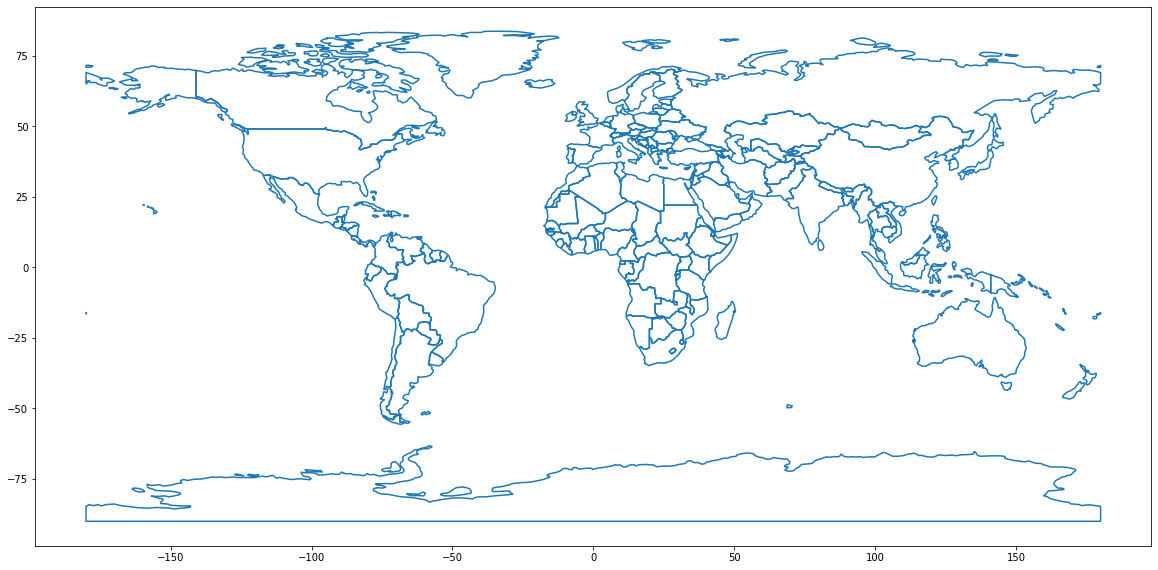

In [10]:
# canva before applying colours
ax = world["geometry"].boundary.plot(figsize=(20,16))


Text(0.5, 1.0, 'Stock market capitalization in Different Countries')

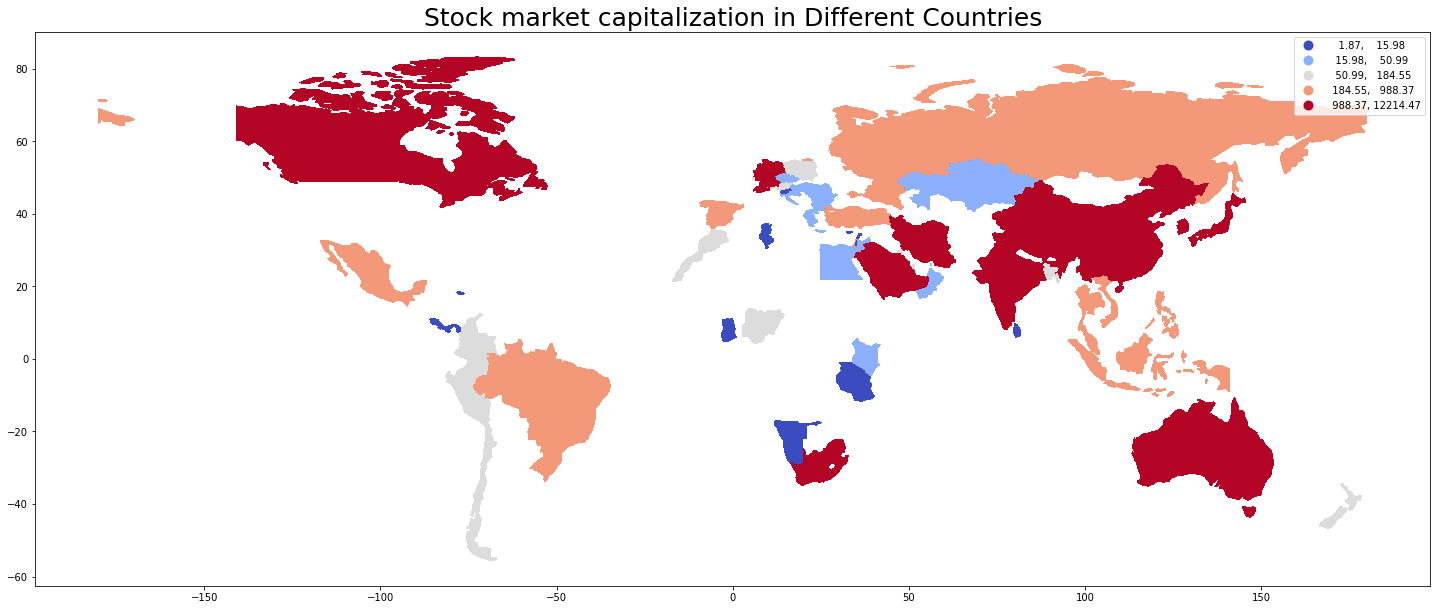

In [11]:
df_teams.plot(column='Stock_market_capitalization', scheme="quantiles",
           figsize=(25, 15),
           legend=True,cmap='coolwarm')
plt.title('Stock market capitalization in Different Countries',fontsize=25)
